In [1]:
import numpy as np
np.set_printoptions(precision = 4)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
S0 = 100
r = 0.02
sigma = 0.4
dt = 1/256
d = 30
path = 10000

S = np.zeros((d+1,path)) 
rnd = np.random.randn(d, path)

S[0] = S0
for i in range(d):
    S[i+1] = S[i] * np.exp((r-sigma**2/2)*dt + sigma/16*rnd[i])

In [3]:
KI_limit = 0.85* S0
KI = np.min(S,axis=0)<KI_limit

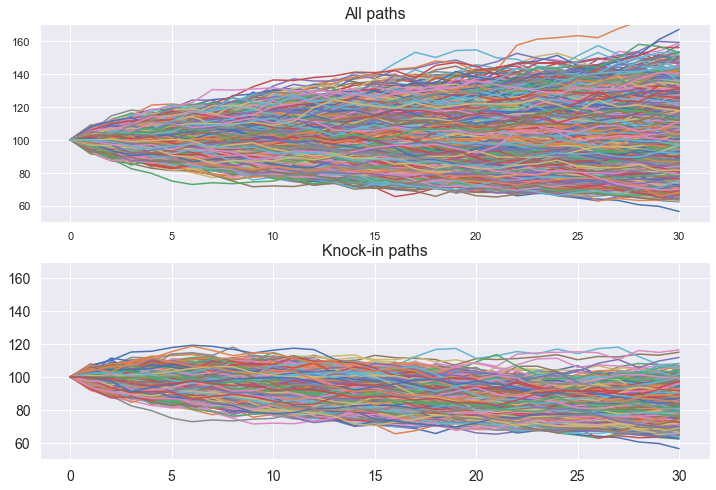

In [4]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
x = np.arange(d+1)

S_path = S[:, :10000] # will be very small if too many path being passed
KI_path = np.min(S_path, axis=0)<KI_limit

ax1.plot(x, S_path)
ax2.plot(x, S_path[:,KI_path])
ax1.set_title("All paths", fontsize = 16)
ax2.set_title("Knock-in paths", fontsize = 16)
ax1.set_ylim(50, 170)
ax2.set_ylim(50, 170)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

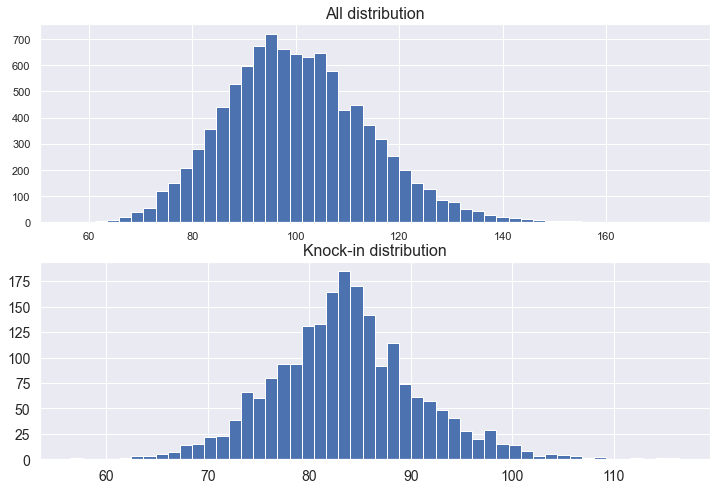

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
x = np.arange(d+1)

ax1.hist(S[-1], bins=50)
ax2.hist(S[-1,KI], bins=50)
ax1.set_title("All distribution", fontsize = 16)
ax2.set_title("Knock-in distribution", fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

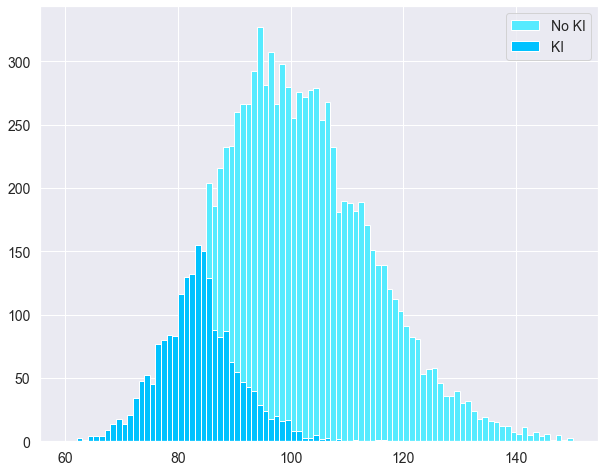

In [6]:
plt.figure(figsize=(10,8))
bins = np.linspace(60, 150, 91)
plt.hist(S[-1], color="#56EBFF", bins=bins, label="No KI")
plt.hist(S[-1,KI], color="#00C2FF", bins=bins, label="KI")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={"size":14});

In [7]:
# More accurate

In [8]:
S0 = 100
r = 0.02
sigma = 0.4
dt = 1/256
d = 30
path = 5000000

S = np.zeros((d+1,path)) 
rnd = np.random.randn(d, path)

S[0] = S0
for i in range(d):
    S[i+1] = S[i] * np.exp((r-sigma**2/2)*dt + sigma/16*rnd[i])

In [9]:
KO_limit = 1.05 * S0
KI_limit = 0.85 * S0

KO1 = S[10,:]>KO_limit
Death = KO1
KO2 = (S[20,:]>KO_limit) & ~Death
Death = Death | KO2
KO3 = (S[30,:]>KO_limit) & ~Death
Death = Death | KO3
DI =(np.min(S,axis=0)<KI_limit) & ~Death

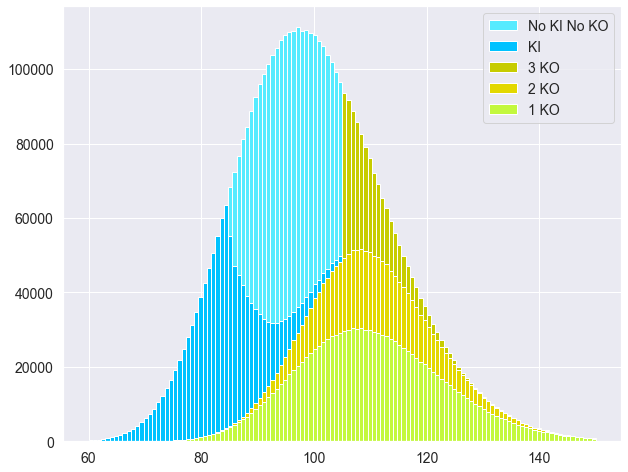

In [10]:
plt.figure(figsize=(10,8))
bins = np.linspace(60, 150, 121)

plt.hist(S[-1], color="#56EBFF", bins=bins, label="No KI No KO")
plt.hist(S[-1, KO1|KO2|KO3|DI], color="#00C2FF", bins=bins, label="KI")
plt.hist(S[-1, KO1|KO2|KO3], color="#C7CC00", bins=bins, label="3 KO")
plt.hist(S[-1, KO1|KO2], color="#E3D800", bins=bins, label="2 KO")
plt.hist(S[-1, KO1], color="#C3F83E", bins=bins, label="1 KO")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={"size":14});

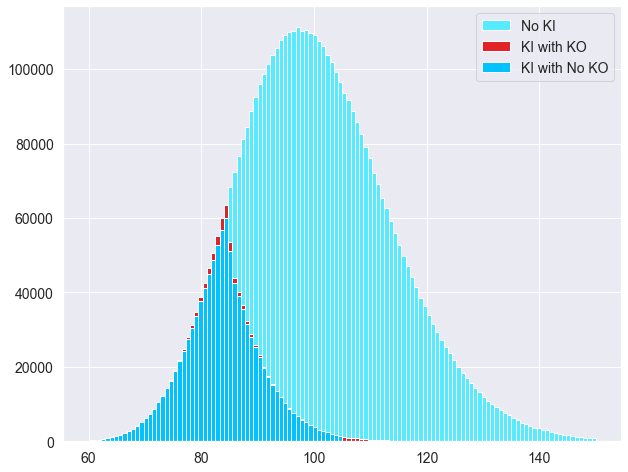

In [12]:
# 有敲出的KI和没敲出的KI
ADI =np.min(S,axis=0)<KI_limit
plt.figure(figsize=(10,8))
bins = np.linspace(60, 150, 121)

plt.hist(S[-1], color="#56EBFF", bins=bins, label="No KI")
plt.hist(S[-1, ADI], color="#E32227", bins=bins, label="KI with KO")
plt.hist(S[-1, DI], color="#00C2FF", bins=bins, label="KI with No KO")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={"size":14});